## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9997352	total: 58.5ms	remaining: 58.4s
1:	learn: 0.9785891	total: 59.6ms	remaining: 29.7s
2:	learn: 0.9584978	total: 60.6ms	remaining: 20.1s
3:	learn: 0.9392753	total: 61.6ms	remaining: 15.3s
4:	learn: 0.9217283	total: 62.5ms	remaining: 12.4s
5:	learn: 0.9042116	total: 63.6ms	remaining: 10.5s
6:	learn: 0.8862581	total: 64.6ms	remaining: 9.16s
7:	learn: 0.8695159	total: 65.5ms	remaining: 8.12s
8:	learn: 0.8531899	total: 66.5ms	remaining: 7.32s
9:	learn: 0.8370886	total: 67.5ms	remaining: 6.68s
10:	learn: 0.8217187	total: 68.3ms	remaining: 6.14s
11:	learn: 0.8074179	total: 69.3ms	remaining: 5.7s
12:	learn: 0.7938198	total: 70.1ms	remaining: 5.32s
13:	learn: 0.7784379	total: 70.9ms	remaining: 5s
14:	learn: 0.7665386	total: 71.8ms	remaining: 4.71s
15:	learn: 0.7524105	total: 72.6ms	remaining: 4.47s
16:	learn: 0.7385650	total: 73.4ms	remaining: 4.25s
17:	learn: 0.7259423	total: 74.3ms	remaining: 4.05s
18:	learn: 0.7135216	total: 75.1ms	remaining: 3.

60:	learn: 0.4112496	total: 108ms	remaining: 1.67s
61:	learn: 0.4074741	total: 109ms	remaining: 1.65s
62:	learn: 0.4028919	total: 110ms	remaining: 1.63s
63:	learn: 0.3995755	total: 111ms	remaining: 1.62s
64:	learn: 0.3956514	total: 111ms	remaining: 1.6s
65:	learn: 0.3915708	total: 112ms	remaining: 1.59s
66:	learn: 0.3874971	total: 113ms	remaining: 1.57s
67:	learn: 0.3842193	total: 114ms	remaining: 1.56s
68:	learn: 0.3808341	total: 115ms	remaining: 1.55s
69:	learn: 0.3766671	total: 116ms	remaining: 1.53s
70:	learn: 0.3730270	total: 116ms	remaining: 1.52s
71:	learn: 0.3698142	total: 117ms	remaining: 1.51s
72:	learn: 0.3668117	total: 118ms	remaining: 1.5s
73:	learn: 0.3643420	total: 119ms	remaining: 1.48s
74:	learn: 0.3611865	total: 119ms	remaining: 1.47s
75:	learn: 0.3582199	total: 120ms	remaining: 1.46s
76:	learn: 0.3557548	total: 121ms	remaining: 1.45s
77:	learn: 0.3530980	total: 122ms	remaining: 1.44s
78:	learn: 0.3501760	total: 123ms	remaining: 1.43s
79:	learn: 0.3478669	total: 124ms

163:	learn: 0.2405957	total: 192ms	remaining: 980ms
164:	learn: 0.2402332	total: 193ms	remaining: 978ms
165:	learn: 0.2397090	total: 194ms	remaining: 975ms
166:	learn: 0.2393200	total: 195ms	remaining: 972ms
167:	learn: 0.2386680	total: 196ms	remaining: 969ms
168:	learn: 0.2382957	total: 196ms	remaining: 965ms
169:	learn: 0.2377370	total: 197ms	remaining: 963ms
170:	learn: 0.2372357	total: 198ms	remaining: 960ms
171:	learn: 0.2365310	total: 199ms	remaining: 957ms
172:	learn: 0.2359361	total: 200ms	remaining: 955ms
173:	learn: 0.2355790	total: 200ms	remaining: 952ms
174:	learn: 0.2348435	total: 202ms	remaining: 950ms
175:	learn: 0.2345733	total: 202ms	remaining: 947ms
176:	learn: 0.2339561	total: 203ms	remaining: 945ms
177:	learn: 0.2335860	total: 204ms	remaining: 942ms
178:	learn: 0.2329854	total: 205ms	remaining: 940ms
179:	learn: 0.2322769	total: 206ms	remaining: 936ms
180:	learn: 0.2316660	total: 206ms	remaining: 934ms
181:	learn: 0.2312233	total: 207ms	remaining: 931ms
182:	learn: 

287:	learn: 0.1860184	total: 299ms	remaining: 738ms
288:	learn: 0.1856731	total: 300ms	remaining: 738ms
289:	learn: 0.1852794	total: 301ms	remaining: 737ms
290:	learn: 0.1847946	total: 302ms	remaining: 735ms
291:	learn: 0.1844923	total: 303ms	remaining: 734ms
292:	learn: 0.1841487	total: 304ms	remaining: 733ms
293:	learn: 0.1838009	total: 305ms	remaining: 731ms
294:	learn: 0.1835890	total: 305ms	remaining: 730ms
295:	learn: 0.1833572	total: 306ms	remaining: 729ms
296:	learn: 0.1831845	total: 307ms	remaining: 728ms
297:	learn: 0.1829779	total: 308ms	remaining: 726ms
298:	learn: 0.1825290	total: 309ms	remaining: 725ms
299:	learn: 0.1821583	total: 310ms	remaining: 723ms
300:	learn: 0.1816321	total: 311ms	remaining: 722ms
301:	learn: 0.1814796	total: 312ms	remaining: 720ms
302:	learn: 0.1810697	total: 313ms	remaining: 719ms
303:	learn: 0.1806568	total: 313ms	remaining: 717ms
304:	learn: 0.1804797	total: 314ms	remaining: 716ms
305:	learn: 0.1802594	total: 315ms	remaining: 714ms
306:	learn: 

386:	learn: 0.1531337	total: 383ms	remaining: 606ms
387:	learn: 0.1526659	total: 384ms	remaining: 606ms
388:	learn: 0.1522830	total: 385ms	remaining: 604ms
389:	learn: 0.1519914	total: 385ms	remaining: 603ms
390:	learn: 0.1517455	total: 386ms	remaining: 602ms
391:	learn: 0.1514463	total: 388ms	remaining: 602ms
392:	learn: 0.1512003	total: 389ms	remaining: 600ms
393:	learn: 0.1508340	total: 389ms	remaining: 599ms
394:	learn: 0.1505660	total: 390ms	remaining: 598ms
395:	learn: 0.1502917	total: 391ms	remaining: 597ms
396:	learn: 0.1499737	total: 392ms	remaining: 595ms
397:	learn: 0.1495721	total: 393ms	remaining: 594ms
398:	learn: 0.1493550	total: 394ms	remaining: 593ms
399:	learn: 0.1490365	total: 394ms	remaining: 592ms
400:	learn: 0.1486842	total: 395ms	remaining: 591ms
401:	learn: 0.1482859	total: 396ms	remaining: 589ms
402:	learn: 0.1480781	total: 397ms	remaining: 588ms
403:	learn: 0.1477580	total: 398ms	remaining: 587ms
404:	learn: 0.1473691	total: 399ms	remaining: 586ms
405:	learn: 

509:	learn: 0.1245826	total: 489ms	remaining: 470ms
510:	learn: 0.1245625	total: 490ms	remaining: 469ms
511:	learn: 0.1242771	total: 491ms	remaining: 468ms
512:	learn: 0.1240678	total: 492ms	remaining: 467ms
513:	learn: 0.1238337	total: 493ms	remaining: 466ms
514:	learn: 0.1237160	total: 494ms	remaining: 465ms
515:	learn: 0.1235239	total: 495ms	remaining: 464ms
516:	learn: 0.1232233	total: 495ms	remaining: 463ms
517:	learn: 0.1229530	total: 496ms	remaining: 462ms
518:	learn: 0.1229340	total: 497ms	remaining: 461ms
519:	learn: 0.1225995	total: 498ms	remaining: 459ms
520:	learn: 0.1222321	total: 499ms	remaining: 458ms
521:	learn: 0.1218701	total: 499ms	remaining: 457ms
522:	learn: 0.1216849	total: 500ms	remaining: 456ms
523:	learn: 0.1214898	total: 501ms	remaining: 455ms
524:	learn: 0.1213168	total: 502ms	remaining: 454ms
525:	learn: 0.1212225	total: 503ms	remaining: 453ms
526:	learn: 0.1210702	total: 503ms	remaining: 452ms
527:	learn: 0.1208082	total: 504ms	remaining: 451ms
528:	learn: 

611:	learn: 0.1058759	total: 573ms	remaining: 364ms
612:	learn: 0.1057565	total: 574ms	remaining: 363ms
613:	learn: 0.1055296	total: 575ms	remaining: 362ms
614:	learn: 0.1053080	total: 576ms	remaining: 361ms
615:	learn: 0.1050821	total: 577ms	remaining: 360ms
616:	learn: 0.1048562	total: 578ms	remaining: 359ms
617:	learn: 0.1048464	total: 579ms	remaining: 358ms
618:	learn: 0.1047204	total: 579ms	remaining: 357ms
619:	learn: 0.1045311	total: 580ms	remaining: 356ms
620:	learn: 0.1043391	total: 581ms	remaining: 355ms
621:	learn: 0.1041174	total: 582ms	remaining: 354ms
622:	learn: 0.1039240	total: 583ms	remaining: 353ms
623:	learn: 0.1036560	total: 583ms	remaining: 352ms
624:	learn: 0.1036434	total: 584ms	remaining: 351ms
625:	learn: 0.1034206	total: 585ms	remaining: 350ms
626:	learn: 0.1032879	total: 586ms	remaining: 349ms
627:	learn: 0.1031392	total: 587ms	remaining: 348ms
628:	learn: 0.1029280	total: 587ms	remaining: 346ms
629:	learn: 0.1026627	total: 589ms	remaining: 346ms
630:	learn: 

740:	learn: 0.0874123	total: 679ms	remaining: 237ms
741:	learn: 0.0874039	total: 680ms	remaining: 236ms
742:	learn: 0.0872362	total: 681ms	remaining: 236ms
743:	learn: 0.0870910	total: 682ms	remaining: 235ms
744:	learn: 0.0869458	total: 683ms	remaining: 234ms
745:	learn: 0.0868445	total: 683ms	remaining: 233ms
746:	learn: 0.0867254	total: 684ms	remaining: 232ms
747:	learn: 0.0866666	total: 685ms	remaining: 231ms
748:	learn: 0.0866126	total: 686ms	remaining: 230ms
749:	learn: 0.0866005	total: 687ms	remaining: 229ms
750:	learn: 0.0865079	total: 688ms	remaining: 228ms
751:	learn: 0.0863824	total: 688ms	remaining: 227ms
752:	learn: 0.0862392	total: 689ms	remaining: 226ms
753:	learn: 0.0862261	total: 690ms	remaining: 225ms
754:	learn: 0.0862182	total: 691ms	remaining: 224ms
755:	learn: 0.0860670	total: 692ms	remaining: 223ms
756:	learn: 0.0858659	total: 693ms	remaining: 222ms
757:	learn: 0.0857156	total: 694ms	remaining: 221ms
758:	learn: 0.0856436	total: 694ms	remaining: 220ms
759:	learn: 

841:	learn: 0.0757015	total: 764ms	remaining: 143ms
842:	learn: 0.0756242	total: 764ms	remaining: 142ms
843:	learn: 0.0754479	total: 765ms	remaining: 141ms
844:	learn: 0.0752979	total: 766ms	remaining: 141ms
845:	learn: 0.0751250	total: 767ms	remaining: 140ms
846:	learn: 0.0749893	total: 768ms	remaining: 139ms
847:	learn: 0.0749028	total: 769ms	remaining: 138ms
848:	learn: 0.0747969	total: 769ms	remaining: 137ms
849:	learn: 0.0746877	total: 770ms	remaining: 136ms
850:	learn: 0.0745779	total: 771ms	remaining: 135ms
851:	learn: 0.0744013	total: 772ms	remaining: 134ms
852:	learn: 0.0742251	total: 773ms	remaining: 133ms
853:	learn: 0.0740822	total: 774ms	remaining: 132ms
854:	learn: 0.0740364	total: 774ms	remaining: 131ms
855:	learn: 0.0739131	total: 775ms	remaining: 130ms
856:	learn: 0.0737538	total: 776ms	remaining: 129ms
857:	learn: 0.0736046	total: 777ms	remaining: 129ms
858:	learn: 0.0734536	total: 777ms	remaining: 128ms
859:	learn: 0.0732953	total: 778ms	remaining: 127ms
860:	learn: 

969:	learn: 0.0639188	total: 869ms	remaining: 26.9ms
970:	learn: 0.0638920	total: 870ms	remaining: 26ms
971:	learn: 0.0638875	total: 871ms	remaining: 25.1ms
972:	learn: 0.0637208	total: 872ms	remaining: 24.2ms
973:	learn: 0.0637160	total: 874ms	remaining: 23.3ms
974:	learn: 0.0636315	total: 875ms	remaining: 22.4ms
975:	learn: 0.0635113	total: 876ms	remaining: 21.5ms
976:	learn: 0.0633949	total: 877ms	remaining: 20.6ms
977:	learn: 0.0632480	total: 878ms	remaining: 19.7ms
978:	learn: 0.0631386	total: 879ms	remaining: 18.8ms
979:	learn: 0.0629995	total: 880ms	remaining: 17.9ms
980:	learn: 0.0629145	total: 880ms	remaining: 17.1ms
981:	learn: 0.0629085	total: 882ms	remaining: 16.2ms
982:	learn: 0.0627720	total: 883ms	remaining: 15.3ms
983:	learn: 0.0626356	total: 883ms	remaining: 14.4ms
984:	learn: 0.0625362	total: 884ms	remaining: 13.5ms
985:	learn: 0.0624695	total: 885ms	remaining: 12.6ms
986:	learn: 0.0623678	total: 886ms	remaining: 11.7ms
987:	learn: 0.0622957	total: 887ms	remaining: 10

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

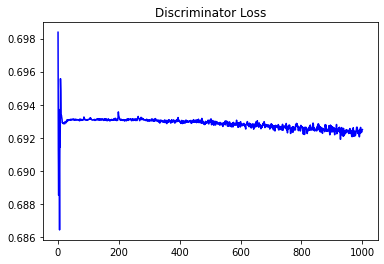

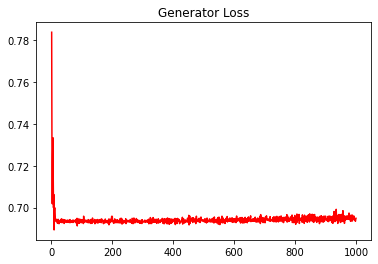

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13065469014915196


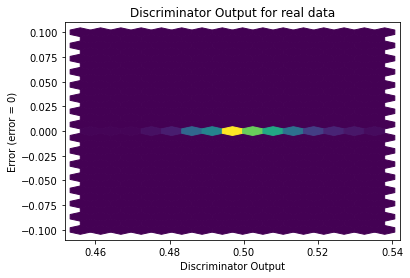

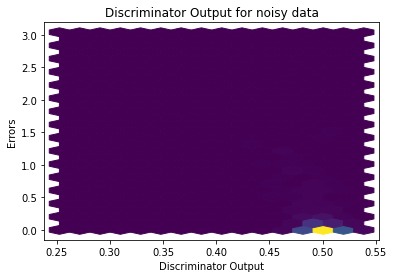

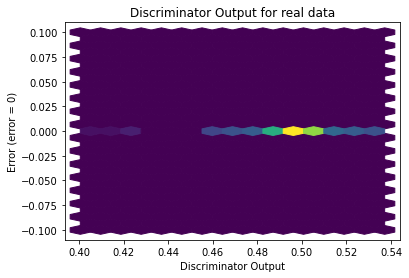

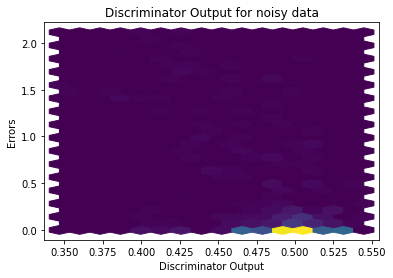

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


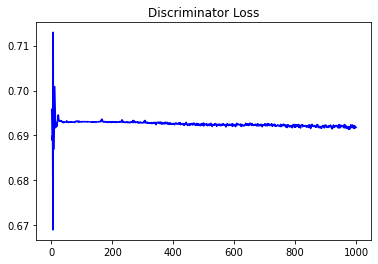

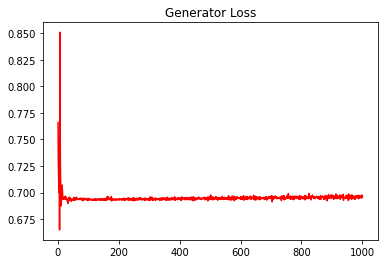

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.12258525136142391


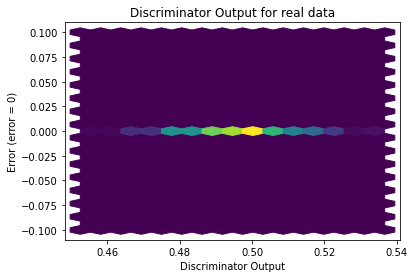

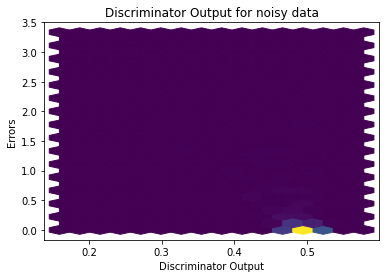

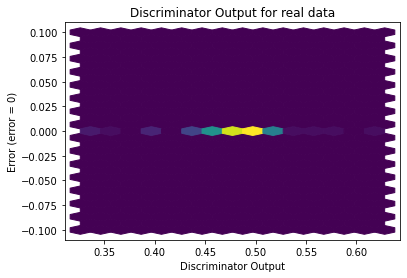

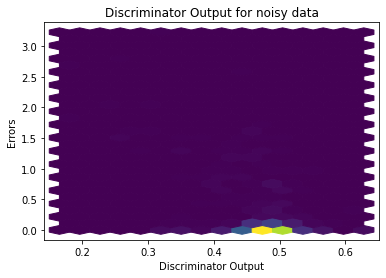

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4993]], requires_grad=True)
